In [1]:
import numpy as np

# Get the Data

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# assign data and target
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


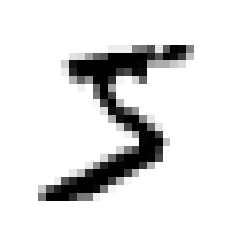

In [4]:
# view one example
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

In [5]:
# data preprocess
y = y.astype(np.uint8)
print(y[0])

5


In [6]:
# manual split
X_train, y_train, X_test, y_test =  X[:60000], y[:60000], X[60000:], y[60000:]

# Binary Classifier

In [7]:
# data isn't for binary classification
# make the data for binary classification of 5 or not 5

y_train_5 = y_train==5
y_test_5 = y_test==5

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([X_train[0]])

array([ True])

# Performance Measures

## Accuracy

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

is accuracy a way to do it?

In [11]:
sum(y_train_5)/len(y_train_5)

# NO, only 9% are positive classes so the data is skewed

0.09035

# Confusion matrix

In [12]:
# confusion matrix do not need scores, it needs the predictions 
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Precision/ Recall/ F1

In [14]:
# do without setting the threshold
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_5, y_pred))
print(recall_score(y_train_5, y_pred))
print(f1_score(y_train_5, y_pred))

0.8370879772350012
0.6511713705958311
0.7325171197343846


In [15]:
# set the threshold: the client want a 90% threshold
# acquire required threshold

# answer: make the decision myself and not the cross_val_predict
y_decn = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [16]:
# get the set of thresholds 
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds =  precision_recall_curve(y_train_5, y_decn)

In [27]:
threshold_90 = thresholds[np.argmax(precisions >= 0.90)]
threshold_90

3370.0194991439557

In [28]:
y_pred_90 = (y_decn >= threshold_90)

In [29]:
precision_score(y_train_5, y_pred_90)

0.9000345901072293

In [30]:
recall_score(y_train_5, y_pred_90)

0.4799852425751706

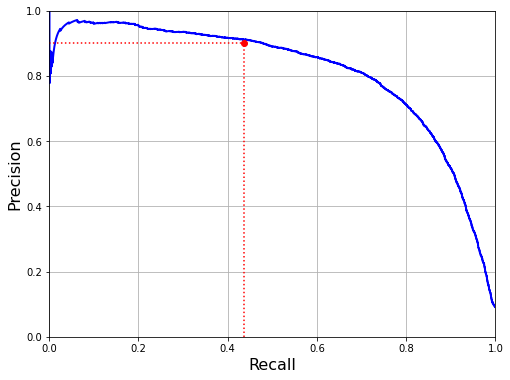

In [31]:
# pr curve
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [32]:
#roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_decn)

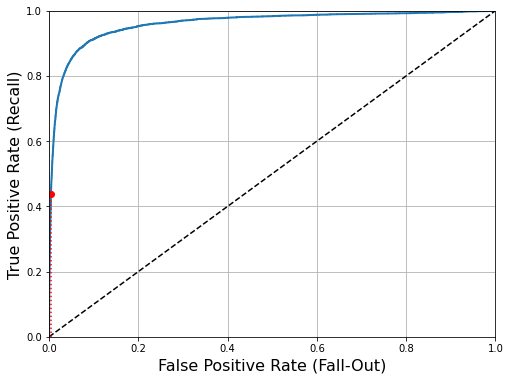

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown                        # Not shown
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_decn)

0.9604938554008616